In [1]:
# Import pandas for data handling
import pandas as pd

# NLTK is our Natural-Language-Took-Kit
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Libraries for helping us with strings
import string
# Regular Expression Library
import re

# Import our text vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# Import our classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier


# Import some ML helper function
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report



# Import our metrics to evaluate our model
from sklearn import metrics


# Library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

import pickle


Bad key "text.kerning_factor" on line 4 in
C:\Users\kukai\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# NAME YOUR MODEL 
filename = 'data/comments.pkl'

## HOW TO LOAD IT FOR FUTURE USE
df = pickle.load(open(filename, 'rb'))

df

,clean_comment,category,clean_comment_profane_free,cleaned_comment
0,family mormon never tried explain still stare ...,1.0,family never tried explain still stare puzzled...,family mormon never tried explain still stare ...
1,buddhism much lot compatible christianity espe...,1.0,buddhism much lot compatible christianity espe...,buddhism much lot compatible christianity espe...
2,seriously say thing first get complex explain ...,-1.0,seriously say thing first get complex explain ...,seriously say thing first get complex explain ...
3,learned want teach different focus goal wrappi...,0.0,learned want teach different focus goal wrappi...,learned want teach different focus goal wrappi...
4,benefit may want read living buddha living chr...,1.0,benefit may want read living buddha living thi...,benefit may want read living buddha living chr...
...,...,...,...,...
201439,cocky,-1.0,,cocky
201440,transsexual,-1.0,,transsexual
201441,unfuckable,-1.0,,unfuckable
201442,bestiality,-1.0,,bestiality


In [3]:
#Seems like good practice to me, creating a single function that will call all
# our necessary functions from one place, will be subject to change
translator = str.maketrans('', '', string.punctuation)

def text_pipeline(input_str):
    input_str = remove_profanity(input_str)
    return input_str

def mk_lower(a):
    return a.lower()

def remove_stopwords(a):
    return " ".join([word for word in word_tokenize(a) if word not in stopwords])

def remove_sp_char(a):
    ## \s for white space, ^ is negation, \w is words.  so replace all punctutation that follows a word 
    return a.translate(translator)

def remove_sp_char2(a):
    return re.sub(r"[^\w\s]", "", a)
    
    
def text_pipeline2(a):
    a = mk_lower(a)
    a = remove_sp_char(a)
    a = remove_stopwords(a)
    return a

In [4]:
mask1 = df["category"] == -1

df.loc[mask1, 'category'] = 0
print(df["category"].unique())

[1. 0.]


In [5]:
X = df["clean_comment"].values
y = df["category"].values

In [6]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [7]:
# Split our data into testing and training like always. 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier()


# Fit our model with our training data.
rf_model.fit(X_train, y_train)


# Make new predictions of our testing data. 
y_pred = rf_model.predict(X_test)


# Make predicted probabilites of our testing data
y_pred_proba = rf_model.predict_proba(X_test)

# Evaluate our model
accuracy =  rf_model.score(X_test, y_test)

# Print our evaluation metrics
print("Model Accuracy: %f" % accuracy)



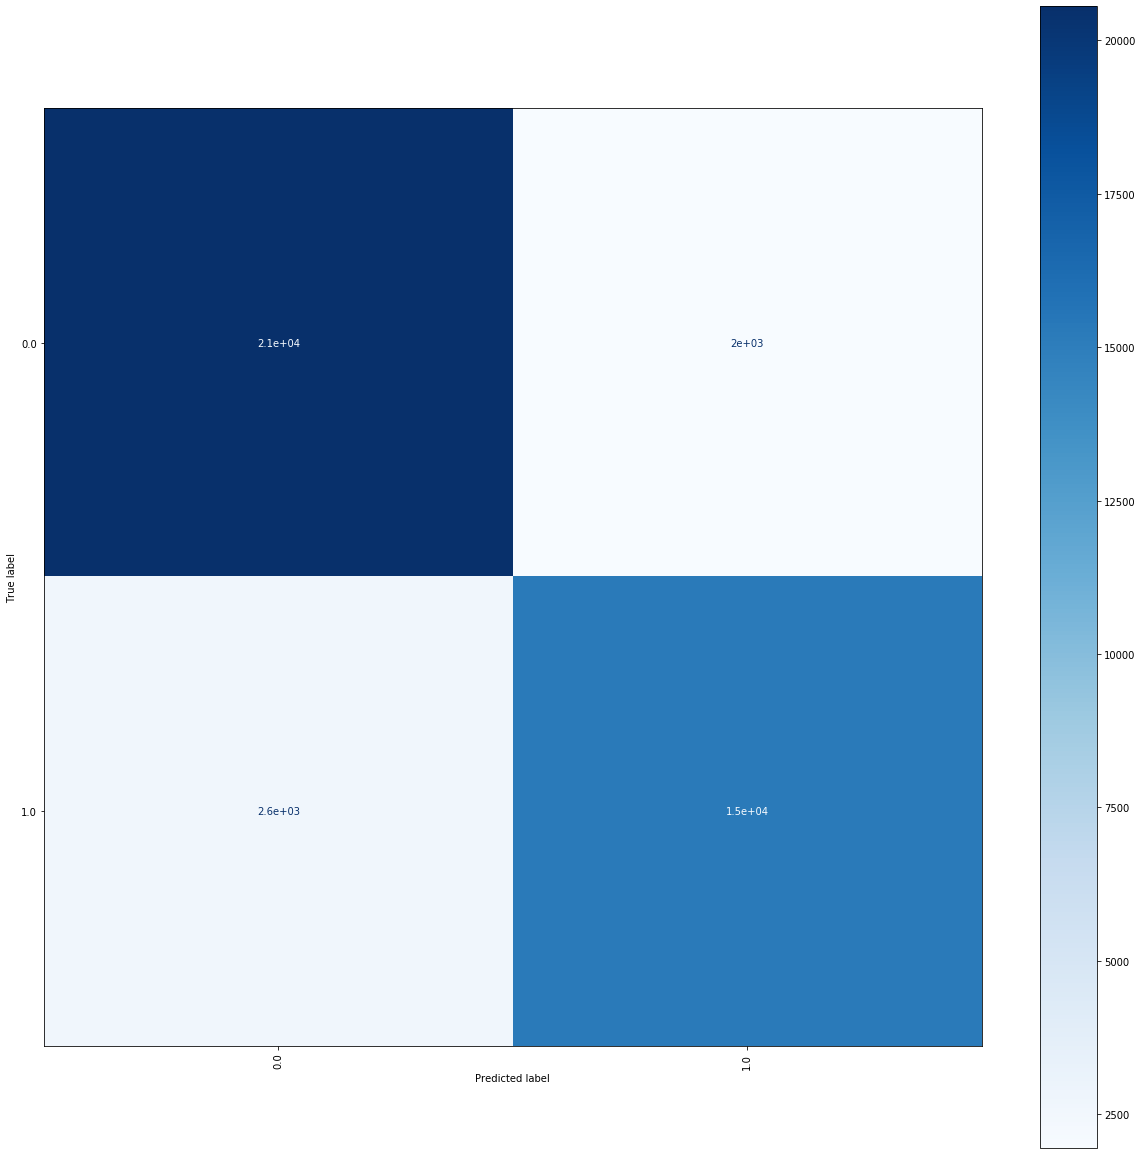

In [9]:
fig, ax = plt.subplots(figsize=(21, 21))
disp = plot_confusion_matrix(rf_model, X_test, y_test,
                             display_labels=rf_model.classes_,
                             cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=90)
disp